# Ch02_Python基础

## Python解释器

#### `?`自省
变量名，函数名等后加`?`获取自省信息。<br>
使用`??`显示函数源码。<br>
和通配符组合，搜索命名空间。

In [1]:
import numpy as np
import pandas as pd

In [78]:
b = [1, 2, 3]
b?

In [79]:
def add_numbers(a, b):
    """
    Add two numbers together

    Returns
    -------
    the_sum : type of arguments
    """
    return a + b

In [88]:
add_numbers??

搜索`DataFrame`的所有`sort`方法

In [86]:
pd.DataFrame.sort*?

## IPython基础
#### `%run`命令

#### `%load`导入脚本

In [ ]:
%load "data del.py" # 运行后获得以下内容

In [ ]:
# %load "data del.py"

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size']=10

data=pd.read_table('DATA\mine\cav20170608_133521_1.TXT')
# data.insert(0,'seconds',2)
capacity=data['试件总能力(W)'][500:8600]
capacity.plot(kind='line')

# data.plot(x=data.index,y='试件总能力(W)',kind='line')
plt.show()


#### 魔术命令
`%timeit expression`：测量执行时间<br>
`%pwd`：当前路径<br>
`%magic`：显示所有魔术命令的详细文档<br>
`%matplotlib inline`：将绘图结果内嵌到notebook中，且不需要`plt.show()`

参考：[Jupyter 魔术命令（整理）](https://www.codenong.com/cs106166368/)

In [94]:
a = np.random.randn(100, 100)

In [95]:
%timeit np.dot(a, a)

113 µs ± 8.77 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [97]:
%pwd

'F:\\GitHub\\notes\\01_Books\\04_Python for DA'

## Python语法基础

#### `isinstance()`
`isinstance(对象名,类型名)`:检查某个对象是否属于这个类型<br>
`isinstance(对象名,(类型1, 类型2))`:检查对象的类型是否在元组中

In [102]:
a=1;b=2.3

In [103]:
isinstance(a,int)

True

In [104]:
isinstance(a,float)

False

In [106]:
isinstance(b,(int,float))

True

#### 属性和方法
`a.<Press Tab>`：变量名后加`.`然后按Tab键可以查看有哪些属性和方法<br>
`getattr(a, attr_name)`：通过getarrt函数访问变量的属性或方法

In [111]:
a = 'foo'
getattr(a, 'split')

<function str.split(sep=None, maxsplit=-1)>

#### raw字符串
在字符串前加一个`r`表示这是一个`raw`字符串没有转义的地方。表明字符就是它自身。

In [113]:
s ='this\has\n\no'
s

'this\\has\n\no'

In [114]:
s =r'this\has\n\no'
s

'this\\has\\n\\no'

####  日期和时间：`datetime`包
时间格式化：`datatime.strftime(%Y-%m-%d)`

所有的格式化命令![](https://camo.githubusercontent.com/3a8fcbe0386dc544573312ff06e0be1337fdfde3c52938b5205df6ea7a10d5a0/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d313030663961323063313533363535332e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)

In [15]:
from datetime import datetime, date, time
now = datetime.now()
now.strftime('%W')

'01'

In [21]:
dt = datetime(2011,8,15)
print(dt.strftime('%Y-%m-%d %H:%M:%S'))
print(dt.strftime('%W'))
print(dt.strftime('%F'))

2011-08-15 00:00:00
33
2011-08-15


#### `for`循环
跳过当前循环剩下的语句：`continue`<br>
中断循环：`break`,只中断循环的最内层。
#### 三元表达式
`value = true_expr if condition else false_expr`<br>
等同于：<br>
`
if condition:
    value = true_expr
else:
    value = false_expr
`

# Ch02_引言(第一版)
## 来自bit.ly的1.usa.gov数据集

In [2]:
import json
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [3]:
path = 'DATA/ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

### 用纯Python代码对时区进行计数

判断字典中是否有某个`key`

In [4]:
dict = records[0]
if 'nk' in dict:
    print("TRUE") 
else:
    print("false")

TRUE


In [5]:
def get_counts(sequence):
    count ={}
    for item in sequence:
        if item in count:
            count[item] +=1
        else:
            count[item] = 1
    return count

In [6]:
count_tz = get_counts(time_zones)

#### `defaultdict`用法
`dict[key]`通常`key`不存在时会报错，用`defaultdict`构造字典，`key`不存在时返回一个默认值.<br>

`dict =defaultdict( factory_function)`

`factory_function`可以是list、set、str等等，作用是当key不存在时，返回的是工厂函数的默认值，比如list对应[ ]，str对应的是空字符串，set对应set( )，int对应0。


In [7]:
from collections import defaultdict
def get_counts2(sequence):
    count = defaultdict(int)  # 所有的值都会被初始化为0
    for item in sequence:
        count[item] +=1
    return counts

In [8]:
def top_counts(count_dict, n =10):
    value_key_pairs = [(count, tz) for tz,count in count_dict.items()]
    value_key_pairs.sort(reverse=True)
    return value_key_pairs[:n]

In [9]:
top_counts(count_tz)

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

### 用`pandas`进行计数

In [10]:
df = DataFrame(records)
tz_counts = df['tz'].value_counts().sort_values(ascending=False)
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [15]:
clean_tz = df['tz'].fillna('Missing') #替换NA值
clean_tz[clean_tz==''] = 'Unknown' #替换空值，空置≠NA

In [16]:
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<AxesSubplot:>

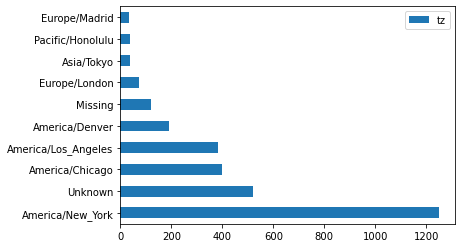

In [18]:
tz_counts[:10].plot(kind = 'barh', rot = 0, legend=True)

In [19]:
results = Series([item.split()[0] for item in df.a.dropna()])
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [33]:
df_drop_a_na = df[df.a.notnull()]
operating_system = np.where(df_drop_a_na.a.str.contains("Windows"), 'Windows', 'Not Windows')

#### `Dataframe.gruopby()`
`Dataframe.gruopby([column_names])`<br>
得到一个DataFrameGroupBy对象。是一个生成器对象，生成的每个元素是一个元组：(分组名, 分组数据)。是一个多级索引的Dataframe。<br>
分组数据是Dataframe的一个数据帧。（参考：[详解pandas的groupby机制](https://zhuanlan.zhihu.com/p/384256189)）
![演示图片](https://pic3.zhimg.com/80/v2-7496b0c72464d441af59fea35544f89a_720w.webp)

In [55]:
by_tz_os = df_drop_a_na.groupby(['tz',operating_system])

In [66]:
print(type(list(by_tz_os)[11]))
print(type(list(by_tz_os)[11][0]))
print(type(list(by_tz_os)[11][1]))

<class 'tuple'>
<class 'tuple'>
<class 'pandas.core.frame.DataFrame'>


In [67]:
list(by_tz_os)[11][0]

('America/Argentina/Mendoza', 'Windows')

In [65]:
list(by_tz_os)[11][1]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
1418,Mozilla/5.0 (Windows NT 5.1; rv:9.0.1) Gecko/2...,AR,0.0,America/Argentina/Mendoza,13,zjfBdL,zfnvMW,gobiernousa,"es-es,es;q=0.8,en-us;q=0.5,en;q=0.3",1.usa.gov,http://t.co/jLmSuynX,http://www.usa.gov/gobiernousa/Temas/Dinero/Cr...,1.331925e+09,1.330459e+09,Mendoza,"[-32.883301, -68.816704]",NaN,NaN


In [106]:
agg_counts = by_tz_os.size().unstack().fillna(0)

#### `Series.argsort()`
对`Series`的值排序后，根据值排序后的顺序，返回值对应的索引号。

如原Series中索引为4的值是-1，值排序后-1在第一位，返回索引4在第一位。<br>`argsort()`生成一个新的`Series`，索引和原`Series`一致，新`Series`的第一个值是4。

In [104]:
test = agg_counts.sum(axis=1)[-10:]
test

tz
Europe/Sofia         1.0
Europe/Stockholm    14.0
Europe/Uzhgorod      1.0
Europe/Vienna        6.0
Europe/Vilnius       2.0
Europe/Volgograd     1.0
Europe/Warsaw       16.0
Europe/Zurich        4.0
Pacific/Auckland    11.0
Pacific/Honolulu    36.0
dtype: float64

test的最小值是1，所对应的位置需要分别为0,2,5，因此返回的`Series`索引和原`Series`一致，前三个值为0,2,5。

In [105]:
test.argsort()

tz
Europe/Sofia        0
Europe/Stockholm    2
Europe/Uzhgorod     5
Europe/Vienna       4
Europe/Vilnius      7
Europe/Volgograd    3
Europe/Warsaw       8
Europe/Zurich       1
Pacific/Auckland    6
Pacific/Honolulu    9
dtype: int64

In [121]:
#根据求和的值排序后返回位置索引，构造一个间接索引数组
indexer = agg_counts.sum(1).argsort()

#### `Dataframe.take()`
`df.take([1,3], axis= 0)`：取第2行和第4行的数据。

`df.take([1], axis= 1)`：取第2列的数据。

In [123]:
count_subset = agg_counts.take(indexer)[-10:]

<AxesSubplot:ylabel='tz'>

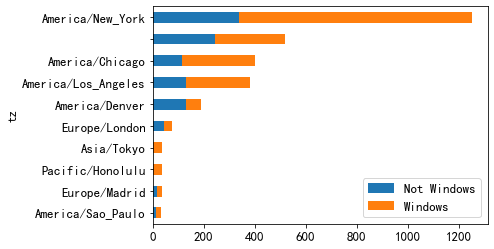

In [128]:
count_subset.plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='tz'>

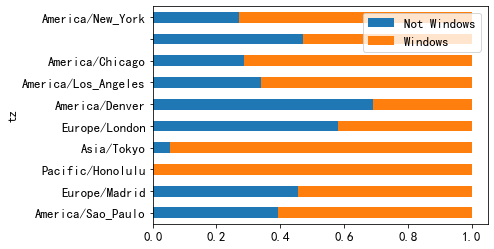

In [132]:
normed_subset = count_subset.div(count_subset.sum(1), axis= 0)
normed_subset.plot(kind = 'barh', stacked=True)

## MovieLens 1M数据集

In [3]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('DATA/ch02/movielens/users.dat', sep='::', header=None, names= unames, engine='python')

In [4]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('DATA/ch02/movielens/ratings.dat', sep='::', header=None, names=rnames, engine='python')

In [5]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('DATA/ch02/movielens/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [6]:
occupations_dict = {0:  "other", 1:  "academic/educator",2:  "artist",3:  "clerical/admin",4:  "college/grad student",5:  "customer service",6:  "doctor/health care",7:  "executive/managerial",8:  "farmer",9:  "homemaker",10:  "K-12 student",11:  "lawyer",12:  "programmer",13:  "retired",14:  "sales/marketing",15:  "scientist",16:  "self-employed",17:  "technician/engineer",18:  "tradesman/craftsman",19:  "unemployed",20:  "writer" }
occupations = DataFrame({'occupation':list(occupations_dict.keys()), 'occupation_name':list(occupations_dict.values())})

In [7]:
data_movie = pd.merge(pd.merge(ratings, users), movies)
data_movie_occu_name = pd.merge(data_movie, occupations)

In [8]:
data_movie[(data_movie.user_id == 1) & (data_movie.movie_id == 1)]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
41626,1,1,5,978824268,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy


#### `DataFrame.pivot_table()`
`DataFrame.pivot_table(values='视图_值对应的列名称', index='视图_行名称', columns='视图_列名称', aggfunc='func_name')`

In [19]:
mean_ratings = data_movie.pivot_table(values='rating',index='title', columns='gender',aggfunc='mean')

In [20]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


### 过滤掉评分数据不够250条的电影

In [11]:
ratings_by_title = data_movie.groupby('title').size()

#### `Series.index([boolean_index])`
用以一个`boolean_index`过滤后生成新的index对象

In [12]:
active_titles = ratings_by_title.index[ratings_by_title >=250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [13]:
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [21]:
#DataFrame.loc() 基于标签进行索引
#DataFrame.iloc() 基于位置需要进行索引
mean_ratings = mean_ratings.loc[active_titles]

### 了解女性最喜欢的电影
对女性的评分进行排序

#### `DataFrame.sort_values()`
`df.sort_values(axis=0, by=['列名称'], ascending = False)`：按照指定的标签对应的行或列的值进行排序<br>
`df.sort_index(axis=0)`：按行索引进行排序<br>
`df.sort_index(axis=1)`：按列索引进行排序<br>

In [22]:
mean_ratings.sort_values(axis=0,by=['F'],ascending = False)

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


### 计算评分分歧

In [29]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by=['diff'])
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [31]:
sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
...,...,...,...
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608


In [32]:
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


找出分歧最大的电影

In [38]:
rating_std_by_title = data_movie.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending =False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 全美婴儿姓名数据集（1880-2010）

In [41]:
names1880 = pd.read_csv('DATA/ch02/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [44]:
names1880.groupby('sex').births.sum(1)

sex
F     90993
M    110493
Name: births, dtype: int64

#### `pandas.concat()`
 `pandas.concat([df1,df2,df3], ignore_index=True)`  
 - `ignore_index`：忽略df1,df2,df3各自的索引，重新建立索引

In [48]:
years = range(1880,2011)
pieces =[]
columns = ['name', 'sex', 'births']

for year in years:
    path = 'DATA/ch02/names/yob%d.txt' %year
    df_temp = pd.read_csv(path, names = columns)
    df_temp['year'] = year
    pieces.append(df_temp)

df_names = pd.concat(pieces, ignore_index=True)

In [50]:
total_births = df_names.pivot_table(values='births', index='year', columns='sex', aggfunc='sum')
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

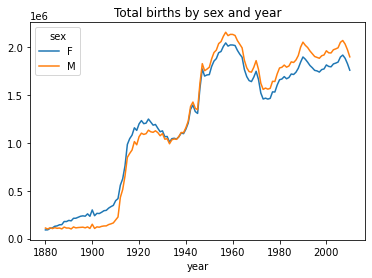

In [55]:
total_births.plot(title = 'Total births by sex and year')

by year计算指定名称的婴儿数相对于总出生数的比例

In [56]:
df_names[:10]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [64]:
names_by_year_name = df_names.groupby(['year', 'sex'])

In [65]:
for item_name, item_df in names_by_year_name:
    print(item_name)
    print(item_df)
    break

(1880, 'F')
          name sex  births  year
0         Mary   F    7065  1880
1         Anna   F    2604  1880
2         Emma   F    2003  1880
3    Elizabeth   F    1939  1880
4       Minnie   F    1746  1880
..         ...  ..     ...   ...
937        Ula   F       5  1880
938     Vannie   F       5  1880
939     Verona   F       5  1880
940     Vertie   F       5  1880
941      Wilma   F       5  1880

[942 rows x 4 columns]


In [66]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

In [ ]:
names_by_year_name = names_by_year_name.

# This is a jupyter test file

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams
# rcParams['axes.edgecolor']='white'
# rcParams['xtick.color']='black'
# rcParams['ytick.color']='black'
# rcParams['axes.labelcolor']='black'
# rcParams['text.color']='black'
rcParams['figure.facecolor']=(1, 1, 1, 1)
# rcParams['figure.edgecolor']=(1, 1, 1, 1)
rcParams['font.family']='simhei'
rcParams['font.size']=13

# list=[(param, value) for param, value in plt.rcParams.items() if 'font' in param]
# list

In [22]:
# names1880=pd.read_csv('data/ch02/names/yob1880.txt',names=['name','sex','births'])
# count_by_sex=names1880.groupby('sex').births.sum()

In [23]:
years=range(1880,2011)
pieces=[]
columns=['name','sex','births']

for year in years:
    relative_path='Machine Learning/python for DA/DATA/ch02/names/yob%d.txt'  % year
    frame=pd.read_csv(relative_path,names=columns)
    frame['year']=year
    pieces.append(frame)

names=pd.concat(pieces,ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Machine Learning/python for DA/DATA/ch02/names/yob1880.txt'

In [ ]:
def plt_year_sex():
    year_sex=names.pivot_table(values='births',columns=['sex'],index=['year'],aggfunc=np.sum)
    year_sex.plot(title='Year-Sex')
    plt.show()

In [ ]:
def add_prop(group):
    births=group.births.astype(float)
    group['prop']=births/births.sum()  #births.sum()是对按year,sex分组后的小组内求和
    return group

In [ ]:
names=names.groupby(['year','sex']).apply(add_prop) #得到1880年name1 Female人数占 1880年 Female总人数的比例
check=np.allclose(names.groupby(['year','sex']).prop.sum(),1)
check

In [ ]:
plt_year_sex()

In [ ]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]  

grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)      #分组后每个小组内排序并取前1000

### 分析命名趋势

In [ ]:
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']

total_births=pd.pivot_table(top1000,values='births',index='year',columns='name',aggfunc=sum)
subset=total_births[['John','Harry','Mary','Marilyn']].fillna(0.0)
subset.plot(subplots=True,figsize=(12,10),grid=False,title='Number of births per year')
plt.show()

In [ ]:
table=top1000.pivot_table(values='prop',index='year',columns='sex',aggfunc=sum)
table.plot(title='前1000个名字在总人数中占的比例的趋势',yticks=np.linspace(0.6,1.1,6),
           xticks=range(1880,2020,10),figsize=(10,6))

In [ ]:
df=boys[boys.year==2010]
prop_cumsum=df.sort_values(by='prop',ascending=False).prop.cumsum()
# prop_cumsum[:10]
prop_cumsum.searchsorted(0.5)[0]

In [ ]:
df2=boys[boys.year==1900]
prop_cumsum=df2.sort_values(by='prop',ascending=False).prop.cumsum()
# prop_cumsum[:10]
prop_cumsum.searchsorted(0.5)[0]      #返回以为ndarray数据类型

In [ ]:
def get_quantile_count(group,q=0.5):
    group=group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().searchsorted(q)[0]+1

### searchsorted
返回一个ndarray对象；<br>
需取零否则报错，不取[0]返回的dataframe对象的每一个value为一个ndarray对象，取[0]→得到具体的值

In [ ]:
diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity=diversity.unstack('sex')
diversity.plot(title='前1000中，占50%人数的名字种类',figsize=(13,6))
plt.axis([1880,2020,0,250])

In [ ]:
get_last_letter=lambda x:x[-1]
last_letters=names.name.map(get_last_letter)
names['last_letter']=last_letters
last_letter_table=names.pivot_table(values='births',index='last_letter',
                                    columns=['sex','year'],aggfunc=sum)
subtable=last_letter_table.reindex(columns=[1910,1960,2010],level='year').fillna(0)
letter_prop=subtable / subtable.sum().astype(float)
fig,axes=plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)
fig.tight_layout()
# plt.subplots_adjust(hspace=0.2)

### subtable.sum和subtable.sum()区别<br>
前者返回一个method对象，后者调用方法，返回一个Series

### 调整subplots子区域之间的间距<br>
#### 1.fig.tight_layout()<br>
#### 2.subplots_adjust
```python
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)<br>
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
```

In [ ]:
last_letter_prop=last_letter_table/last_letter_table.sum().astype(float)
dny_ts=last_letter_prop.loc[['d','y','n'],'M'].T
dny_ts.plot(figsize=(10,5),title='男性名字以d、y、n结尾的趋势',xticks=range(1880,2021,10))
# plt.axis([1880,2020,0,0.4])

In [ ]:
all_names=top1000.name.unique()
mask=np.array(['lesl' in x.lower() for x in all_names])
lesley_like=all_names[mask]

filtered=top1000[top1000.name.isin(lesley_like)]

lesley_table=filtered.pivot_table(values='births',index='year',columns='sex',aggfunc=sum)
lesley_table=lesley_table.div(lesley_table.sum(1),axis=0)
lesley_table.plot(style={'M':'k-','F':'k--'},figsize=(10,5))